In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# # Set the display option to show all columns without truncation
# pd.set_option("display.max_columns", None)
# # Set the display option to show all rows without truncation
# pd.set_option("display.max_rows", None)

In [3]:
# Read the data from the CSV file into a pandas DataFrame
app = pd.read_csv("application_data.csv")  # Read application data
papp = pd.read_csv("previous_application.csv")  # Read previous application data

# Display the first 5 rows of the DataFrame to inspect the data
papp.head(5)  # Display the first 5 rows of the previous application data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Set the cutoff value for the percentage of missing values
cutoff = 30

# Create a list of column names where the percentage of missing values is greater than the cutoff
cols = list(app.columns[app.isnull().mean() * 100 > cutoff])

# Display the list of columns
cols

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

In [5]:
# Drop the columns specified in the 'cols' list from the DataFrame 'app'
app = app.drop(cols, axis=1)

In [6]:
# Accessing the 'shape' attribute of the 'app' object
app.shape

(307511, 72)

In [7]:
# Calculate the percentage of missing values for each column in the DataFrame
app.isnull().mean() * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 72, dtype: float64

In [8]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [9]:
# List of irrelevant columns to be dropped from the dataframe
irrelevant_columns = [
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',  # Binary flags
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
    'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'  # Document flags
]

# Dropping the irrelevant columns from the dataframe
app.drop(columns=irrelevant_columns, inplace=True)

In [10]:
#check colmuns after droping
app.shape

(307511, 46)

In [11]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
# Calculate the percentage of missing values for each column, sort the results in ascending order, and multiply by 100
100 * app.isnull().mean().sort_values()

SK_ID_CURR                      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_POPULATION_RELATIVE      0.000000
REGION_RATING_CLIENT            0.000000
NAME_FAMILY_STATUS              0.000000
TARGET                          0.000000
NAME_HOUSING_TYPE               0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL

In [13]:
app[['AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_3']].head(10)

,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3
0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376
1,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.729567
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,1.0,0.0,0.0,0.0,0.0,1.0,0.621226
6,1.0,0.0,0.0,0.0,1.0,2.0,0.492060
7,0.0,0.0,0.0,0.0,0.0,0.0,0.540654
8,0.0,0.0,0.0,0.0,0.0,1.0,0.751724
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
app['AMT_REQ_CREDIT_BUREAU_MON'].median()

0.0

In [15]:
# List of columns to replace NaN values with their median
selected_columns = ['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_3']

# Replace NaN values with the median values for each column
for col in selected_columns:
    median_value = app[col].median()
    app[col].fillna(median_value, inplace=True)



C:\Users\Omkar\AppData\Local\Temp\ipykernel_27748\1641540147.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app[col].fillna(median_value, inplace=True)


In [16]:
#again check the nan values
100*app.isnull().mean().sort_values()

SK_ID_CURR                     0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
DAYS_ID_PUBLISH                0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
EXT_SOURCE_3                   0.000000
AMT_REQ_CREDIT_BUREAU_HOUR     0.000000
AMT_REQ_CREDIT_BUREAU_DAY      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
REG_CITY_NOT_WORK_CITY         0.000000
DAYS_REGISTRATION              0.000000
REGION_RATING_CLIENT           0.000000
DAYS_BIRTH                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000


In [17]:
app[['DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','NAME_TYPE_SUITE']].head(10)

,DAYS_LAST_PHONE_CHANGE,CNT_FAM_MEMBERS,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,NAME_TYPE_SUITE
0,-1134.0,1.0,24700.5,351000.0,0.262949,2.0,2.0,2.0,Unaccompanied
1,-828.0,2.0,35698.5,1129500.0,0.622246,1.0,0.0,1.0,Family
2,-815.0,1.0,6750.0,135000.0,0.555912,0.0,0.0,0.0,Unaccompanied
3,-617.0,2.0,29686.5,297000.0,0.650442,2.0,0.0,2.0,Unaccompanied
4,-1106.0,1.0,21865.5,513000.0,0.322738,0.0,0.0,0.0,Unaccompanied
5,-2536.0,2.0,27517.5,454500.0,0.354225,0.0,0.0,0.0,"Spouse, partner"
6,-1562.0,3.0,41301.0,1395000.0,0.724000,1.0,0.0,1.0,Unaccompanied
7,-1070.0,2.0,42075.0,1530000.0,0.714279,2.0,0.0,2.0,Unaccompanied
8,0.0,2.0,33826.5,913500.0,0.205747,1.0,0.0,1.0,Children
9,-1673.0,1.0,20250.0,405000.0,0.746644,2.0,0.0,2.0,Unaccompanied


In [18]:
app.shape

(307511, 46)

In [19]:
# Drop rows with missing values in specific columns as they are less in number
app.dropna(subset=['DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY'], inplace=True)
app.shape

(307496, 46)

In [20]:
# List of columns to impute with median
impute_columns = ['AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

# Impute missing values with the median for each column
for col in impute_columns:
    median_value = app[col].median()
    app[col].fillna(median_value, inplace=True)


C:\Users\Omkar\AppData\Local\Temp\ipykernel_27748\3733983899.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app[col].fillna(median_value, inplace=True)


In [21]:
100*app.isnull().mean().sort_values()

SK_ID_CURR                     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
EXT_SOURCE_2                   0.000000
EXT_SOURCE_3                   0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.000000
DAYS_LAST_PHONE_CHANGE         0.000000
AMT_REQ_CREDIT_BUREAU_HOUR     0.000000
AMT_REQ_CREDIT_BUREAU_DAY      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
REGION_RATING_CLIENT           0.000000
CNT_FAM_MEMBERS                0.000000
TARGET                         0.000000


In [22]:
# Calculate the mode of the NAME_TYPE_SUITE column
mode_value = app['NAME_TYPE_SUITE'].mode()[0]

# Fill the missing values in the NAME_TYPE_SUITE column with the mode
app['NAME_TYPE_SUITE'].fillna(mode_value, inplace=True)


C:\Users\Omkar\AppData\Local\Temp\ipykernel_27748\454909911.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app['NAME_TYPE_SUITE'].fillna(mode_value, inplace=True)


In [23]:
100*app.isnull().mean().sort_values()

SK_ID_CURR                     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
DAYS_LAST_PHONE_CHANGE         0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
WEEKDAY_APPR_PROCESS_START     0.0
REGION_RATING_CLIENT_W_CITY    0.0
REGION_RATING_CLIENT           0.0
CNT_FAM_MEMBERS                0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY     

# Save the DataFrame to a CSV file at the specified path I do this because i want to save my work instead of rerunning all the cell, i just read the modify data and start the work thereafter

In [25]:
# Save the DataFrame to a CSV file at the specified path, without including the index()
app.to_csv('C:/Users/omkar/Desktop/DS/EDA/Credit_EDA_assignment/After_EDA_APP.csv', index=False)

In [26]:
# Read the CSV file "After_EDA_APP.csv" into a pandas DataFrame and store it in the variable 'appn'
appn = pd.read_csv("After_EDA_APP.csv")

# Display the first 10 rows of the DataFrame 'appn'
appn.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0.0,2.0,0.0,-1673.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
# Access the NAME_FAMILY_STATUS attribute of the appn object
appn.NAME_FAMILY_STATUS

0         Single / not married
1                      Married
2         Single / not married
3               Civil marriage
4         Single / not married
                  ...         
307491               Separated
307492                   Widow
307493               Separated
307494                 Married
307495                 Married
Name: NAME_FAMILY_STATUS, Length: 307496, dtype: object

In [28]:
appn['NAME_FAMILY_STATUS'] = appn['NAME_FAMILY_STATUS'].replace('Single / not married', 'Single')
appn.NAME_FAMILY_STATUS

0                 Single
1                Married
2                 Single
3         Civil marriage
4                 Single
               ...      
307491         Separated
307492             Widow
307493         Separated
307494           Married
307495           Married
Name: NAME_FAMILY_STATUS, Length: 307496, dtype: object

In [29]:
# Accessing the DAYS_BIRTH column from the appn dataframe
appn.DAYS_BIRTH

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307491    -9327
307492   -20775
307493   -14966
307494   -11961
307495   -16856
Name: DAYS_BIRTH, Length: 307496, dtype: int64

In [30]:
# Calculate age in years from the 'DAYS_BIRTH' column and store it in a new column 'AGE'
appn['AGE'] = (-appn['DAYS_BIRTH'] // 365.25).astype(int)

# Print the 'AGE' column to display the calculated ages
print(appn['AGE'])

# Display the first 3 rows of the dataframe to verify the changes
print(appn.head(3))

0         25
1         45
2         52
3         52
4         54
          ..
307491    25
307492    56
307493    40
307494    32
307495    46
Name: AGE, Length: 307496, dtype: int32
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       1.0                      0.0   
2  ...                       0.0            

In [31]:
# Drop the 'DAYS_BIRTH' column from the dataframe 'appn'
appn = appn.drop(columns=['DAYS_BIRTH'])
appn  # Display the updated dataframe

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307491,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0,25
307492,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56
307493,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,40
307494,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,32


In [32]:
appn

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307491,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0,25
307492,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56
307493,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,40
307494,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,32


In [33]:
appn.to_csv('After_EDA_APP.csv', index=False)


In [34]:
app=pd.read_csv("After_EDA_APP.csv")
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307491,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0,25
307492,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56
307493,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,40
307494,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,32


In [35]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307496 entries, 0 to 307495
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307496 non-null  int64  
 1   TARGET                       307496 non-null  int64  
 2   NAME_CONTRACT_TYPE           307496 non-null  object 
 3   CODE_GENDER                  307496 non-null  object 
 4   FLAG_OWN_CAR                 307496 non-null  object 
 5   FLAG_OWN_REALTY              307496 non-null  object 
 6   CNT_CHILDREN                 307496 non-null  int64  
 7   AMT_INCOME_TOTAL             307496 non-null  float64
 8   AMT_CREDIT                   307496 non-null  float64
 9   AMT_ANNUITY                  307496 non-null  float64
 10  AMT_GOODS_PRICE              307496 non-null  float64
 11  NAME_TYPE_SUITE              307496 non-null  object 
 12  NAME_INCOME_TYPE             307496 non-null  object 
 13 

In [36]:
app.shape

(307496, 46)

# Data cleaning on previous_application

In [38]:
papp=pd.read_csv('previous_application.csv')
papp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
papp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [40]:

papp.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [41]:
# Set the cutoff value for the percentage of missing values
cutoff = 30

# Create a list of column names where the percentage of missing values is greater than the cutoff
cols = list(papp.columns[papp.isnull().mean() * 100 > cutoff])

# Display the list of columns
cols

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [42]:
# Drop columns specified in the 'cols' list from the DataFrame 'papp'
papp = papp.drop(cols, axis=1)



In [43]:
# Calculate the percentage of missing values for each column, sort the results, and multiply by 100
100 * papp.isnull().mean().sort_values()

SK_ID_PREV                      0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_YIELD_GROUP                0.000000
NAME_CONTRACT_STATUS            0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
AMT_CREDIT                      0.000060
PRODUCT_COMBINATION             0.020716
CNT_PAYMENT                    22.286366
AMT_ANNUITY     

<Axes: >

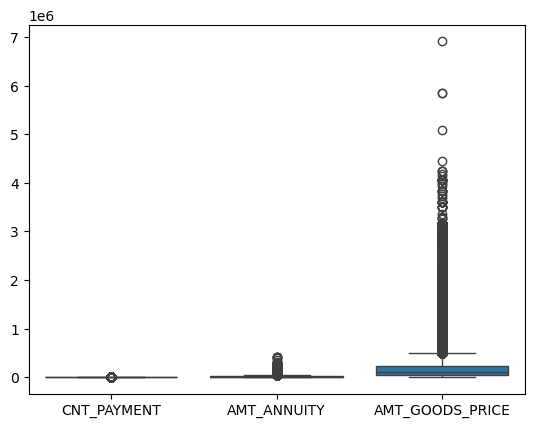

In [44]:

sns.boxplot(data=papp[['CNT_PAYMENT']])
sns.boxplot(data=papp[['AMT_ANNUITY']])
sns.boxplot(data=papp[['AMT_GOODS_PRICE']])

In [45]:
papp[['AMT_GOODS_PRICE']].median()

AMT_GOODS_PRICE    112320.0
dtype: float64

In [46]:
# Fill missing values in the 'AMT_ANNUITY' column with 0
papp['AMT_ANNUITY'].fillna(0, inplace=True)

# Fill missing values in the 'AMT_GOODS_PRICE' column with 0
papp['AMT_GOODS_PRICE'].fillna(0, inplace=True)

C:\Users\Omkar\AppData\Local\Temp\ipykernel_27748\3675898703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  papp['AMT_ANNUITY'].fillna(0, inplace=True)
C:\Users\Omkar\AppData\Local\Temp\ipykernel_27748\3675898703.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [47]:
100 * papp.isnull().mean().sort_values()

SK_ID_PREV                      0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
NAME_YIELD_GROUP                0.000000
NAME_CONTRACT_STATUS            0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_GOODS_PRICE                 0.000000
AMT_APPLICATION                 0.000000
AMT_ANNUITY                     0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
AMT_CREDIT                      0.000060
PRODUCT_COMBINAT

In [48]:
papp = papp.drop(columns=['CNT_PAYMENT'])
papp

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,low_normal,Cash X-Sell: low


In [49]:
papp[['AMT_CREDIT','PRODUCT_COMBINATION']]

,AMT_CREDIT,PRODUCT_COMBINATION
0,17145.0,POS mobile with interest
1,679671.0,Cash X-Sell: low
2,136444.5,Cash X-Sell: high
3,470790.0,Cash X-Sell: middle
4,404055.0,Cash Street: high
...,...,...
1670209,311400.0,POS industry with interest
1670210,64291.5,POS industry with interest
1670211,102523.5,POS household with interest
1670212,191880.0,Cash X-Sell: low


In [50]:
# Fill missing values in the 'AMT_CREDIT' column with 0
papp['AMT_CREDIT'].fillna(0, inplace=True)
papp = papp.dropna(subset=['PRODUCT_COMBINATION'])

C:\Users\Omkar\AppData\Local\Temp\ipykernel_27748\1978898214.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  papp['AMT_CREDIT'].fillna(0, inplace=True)


In [51]:
# Save the DataFrame to a CSV file with the specified file path and name, and exclude the index from being written to the file
papp.to_csv('After_EDA_PREVIOUS_APP.csv', index=False)

In [52]:
#again read the new dataset which was saved for feature engineering purpose
application = pd.read_csv('After_EDA_APP.csv')

application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307491,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0,25
307492,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56
307493,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,40
307494,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,32


In [53]:
# i want to create a new column to identify DAYS_EMPLOYED in years
application.DAYS_EMPLOYED.head()
# Convert DAYS_EMPLOYED from days to years
application['YEARS_EMPLOYED'] = application['DAYS_EMPLOYED'] / 365.25

application[['DAYS_EMPLOYED','YEARS_EMPLOYED']] 

,DAYS_EMPLOYED,YEARS_EMPLOYED
0,-637,-1.744011
1,-1188,-3.252567
2,-225,-0.616016
3,-3039,-8.320329
4,-3038,-8.317591
...,...,...
307491,-236,-0.646133
307492,365243,999.980835
307493,-7921,-21.686516
307494,-4786,-13.103354


In [54]:
#same this colmuns have negative all negative values convert them to positive
# Columns to convert
columns_to_convert = ['DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE','YEARS_EMPLOYED']

# Convert to positive values
application[columns_to_convert] = application[columns_to_convert].abs()
application[columns_to_convert].head()

,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,YEARS_EMPLOYED
0,2120,3648.0,637,1134.0,1.744011
1,291,1186.0,1188,828.0,3.252567
2,2531,4260.0,225,815.0,0.616016
3,2437,9833.0,3039,617.0,8.320329
4,3458,4311.0,3038,1106.0,8.317591


In [55]:
application.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67989
XNA                       55374
Self-employed             38409
Other                     16681
Medicine                  11192
Business Entity Type 2    10552
Government                10403
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3491
Industry: type 9           3368
Industry: type 3           3278
Security                   3246
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [56]:
# Calculate the mode of the ORGANIZATION_TYPE column
mode_value = application['ORGANIZATION_TYPE'].mode()[0]
mode_value

'Business Entity Type 3'

In [57]:
(application[application.ORGANIZATION_TYPE == 'XNA'].shape[0] / application.shape[0]) * 100

18.008039128964278

In [58]:
# Calculate the mode of the ORGANIZATION_TYPE column
mode_value = application['ORGANIZATION_TYPE'].mode()[0]

# Replace 'XNA' with the mode value
application['ORGANIZATION_TYPE'].replace('XNA', mode_value, inplace=True)

# Verify the replacement
print(application['ORGANIZATION_TYPE'].value_counts())

ORGANIZATION_TYPE
Business Entity Type 3    123363
Self-employed              38409
Other                      16681
Medicine                   11192
Business Entity Type 2     10552
Government                 10403
School                      8893
Trade: type 7               7831
Kindergarten                6880
Construction                6721
Business Entity Type 1      5983
Transport: type 4           5398
Trade: type 3               3491
Industry: type 9            3368
Industry: type 3            3278
Security                    3246
Housing                     2958
Industry: type 11           2704
Military                    2634
Bank                        2507
Agriculture                 2454
Police                      2341
Transport: type 2           2204
Postal                      2157
Security Ministries         1974
Trade: type 2               1900
Restaurant                  1811
Services                    1575
University                  1327
Industry: type 7         

C:\Users\Omkar\AppData\Local\Temp\ipykernel_27748\2649641779.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  application['ORGANIZATION_TYPE'].replace('XNA', mode_value, inplace=True)


In [59]:
application.CODE_GENDER.value_counts()

CODE_GENDER
F      202439
M      105053
XNA         4
Name: count, dtype: int64

In [60]:
# Replace 'XNA' values in CODE_GENDER with 'F'
application.loc[application.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'
application.CODE_GENDER.value_counts()

CODE_GENDER
F    202443
M    105053
Name: count, dtype: int64

In [61]:
# Save the DataFrame to a CSV file with the specified file path and name, and exclude the index from being written to the file
application.to_csv('After_EDA_APP.csv', index=False)